# Assignment 2

Spiral Excitation pulses


kmax for 0.5cm resolution: 1.355045185484397 KHz
N_turns for 8cm sidelobe: 8.0


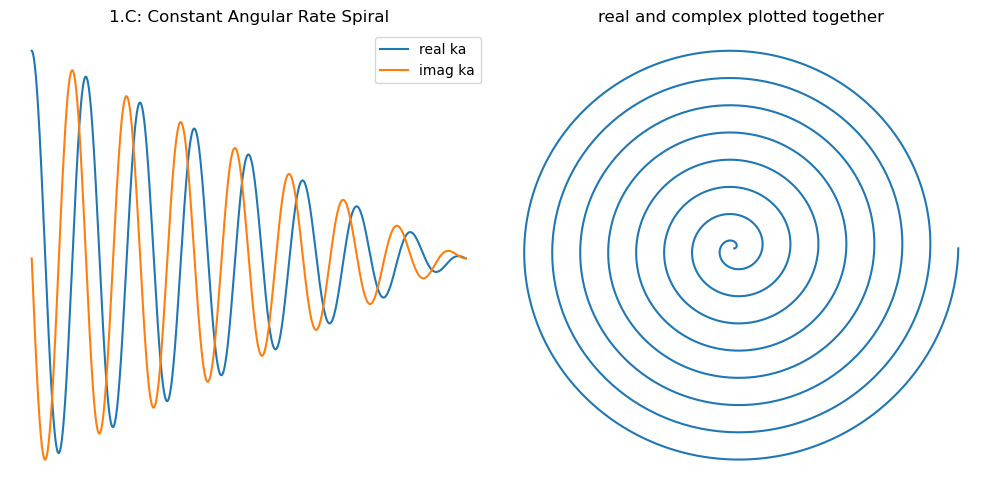

In [73]:
# Import your libraries here
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import sys

#gyro = 42.576E6*1.5 #MHz/T; the 1T gyromagnetic ratio. Upscaled for 1.5T.
gyro = 42.576E6 #MHz/T; the 1T gyromagnetic ratio. 
#but we are working in gauss, not Tesla, so its 1000x smaller
gyro = 42.576E6*1E-4 #MHz/Gauss; the 1T gyromagnetic ratio. 
gyro = 4257# 

g_max = 4 #G/cm
g_slew= 15#G/cm/ms

#gyro/2pi*G*dZ = 4kHz
dZ = 0.5#cm
kmax = gyro/(2*np.pi) *g_max * dZ#
kmax = kmax/1E3 #normalize to khz
print(f"kmax for 0.5cm resolution: {kmax} KHz")


#dR = 1/(2*k_max)
#FOV_sidelobe=1/dK=2N/2kmax
#side_lobe = 2*N_turns*dR
N_turns = 8/0.5/2 #8*dZ/2 
print(f"N_turns for 8cm sidelobe: {N_turns}")

t = np.linspace(0,1,2048)
ka = kmax*(1-t) * np.exp(1j*2*np.pi*N_turns*(1-t)) #1-t is for time reversal of excitation
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(np.real(ka), label="real ka")
axes[0].plot(np.imag(ka),label="imag ka")
axes[0].legend()
axes[0].set_title("1.C: Constant Angular Rate Spiral")
axes[0].axis('off')
axes[1].plot(np.real(ka),np.imag(ka))
axes[1].set_title('real and complex plotted together')
axes[1].axis('off')
plt.tight_layout()
plt.show()



Gradient duration is  4.923 ms


/home/jake/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


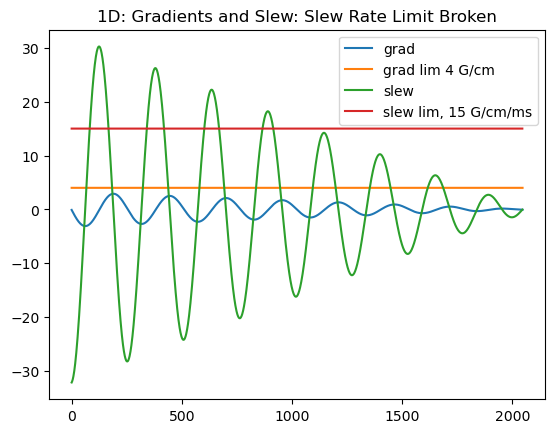

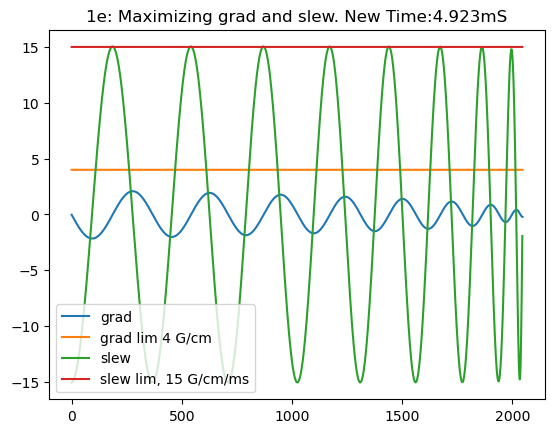

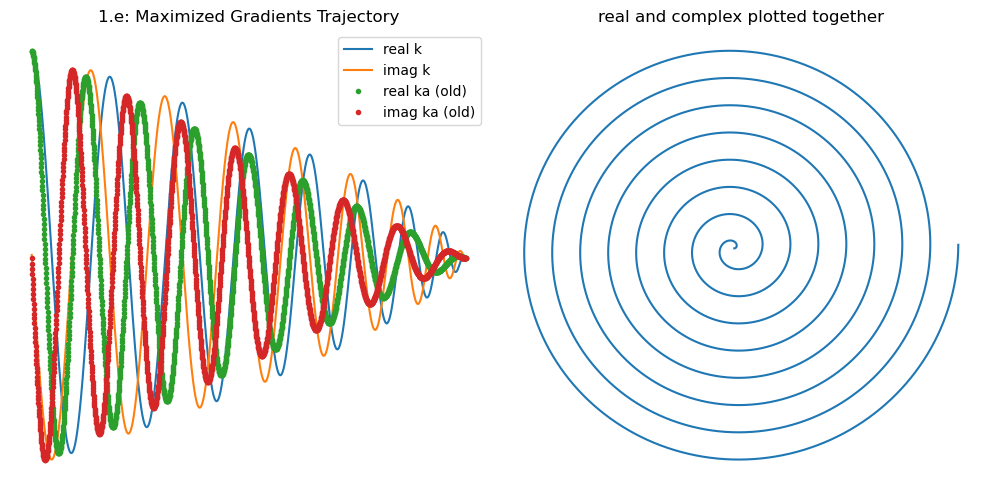

In [76]:
#1d):
from ktog import *
from ktos import *

time_total = 5
dt = time_total/2048
g = ktog(ka,dt)
s = ktos(ka,dt)
plt.figure()
plt.title("1D: Gradients and Slew: Slew Rate Limit Broken")
plt.plot(g, label="grad")
plt.plot(4*np.ones(len(g)),label='grad lim 4 G/cm')
#plt.legend()
#plt.figure()
plt.plot(s,label="slew")
plt.plot(15*np.ones(len(s)), label="slew lim, 15 G/cm/ms")
plt.legend()

#1e): 
from csg import *
k,dt = csg(ka,4,15) #(ka, gmax,slewmax)
g = ktog(k,dt)
s = ktos(k,dt)
plt.figure()
plt.title(f"1e: Maximizing grad and slew. New Time:{dt*len(k):0.3f}mS")
plt.plot(g, label="grad")
plt.plot(4*np.ones(len(g)),label='grad lim 4 G/cm')
#plt.legend()
#plt.figure()
plt.plot(s,label="slew")
plt.plot(15*np.ones(len(s)), label="slew lim, 15 G/cm/ms")
plt.legend()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(np.real(k), label="real k")
axes[0].plot(np.imag(k),label="imag k")
axes[0].plot(np.real(ka), '.', label="real ka (old)")
axes[0].plot(np.imag(ka), '.', label="imag ka (old)")
axes[0].legend()
axes[0].set_title("1.e: Maximized Gradients Trajectory")
axes[0].axis('off')
axes[1].plot(np.real(k),np.imag(k))
axes[1].set_title('real and complex plotted together')
axes[1].axis('off')
plt.tight_layout()
plt.show()


In [66]:
k

(array([1.35530535+2.23790478e-02j, 1.35504497-1.09304071e-05j,
        1.35441454-2.23898586e-02j, ..., 0.00440347+7.36012831e-04j,
        0.00222542+1.84768512e-04j, 0.        +0.00000000e+00j]),
 0.0024039344267764943)

In [52]:
g

array([-1029947.00589439-3.20012863e+07j,
       -1814794.94230034-3.19507187e+07j,
       -2597781.04004971-3.18809147e+07j, ...,
        -633373.52080516-7.81102221e+04j,
        -635676.45391197-4.69038458e+04j,
        -636828.49933282-1.56409024e+04j])

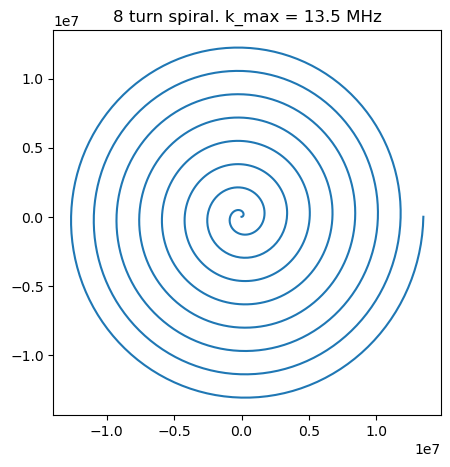

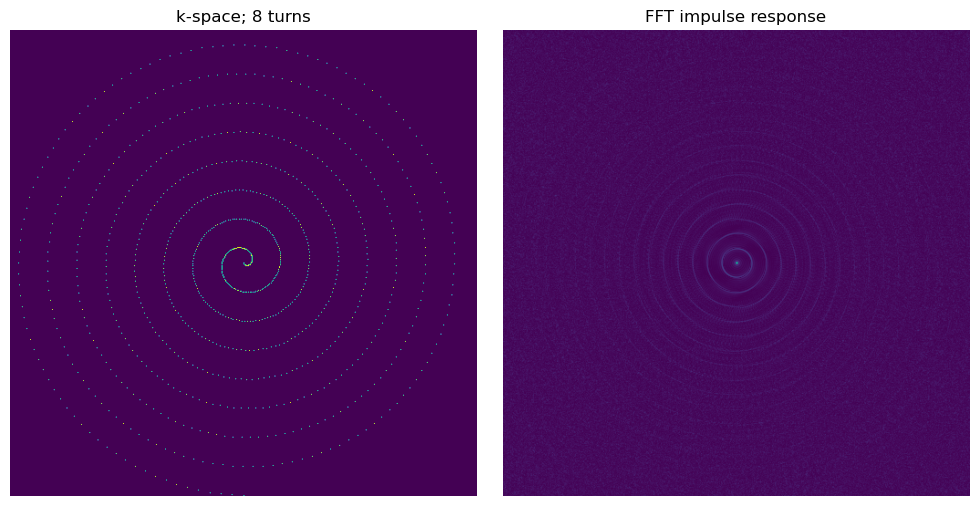

In [43]:
N_turns = 8
k_max = 13.5E6

dR = 1/(2*k_max)
#FOV_sidelobe=1/dK=2N/2kmax
side_lobe = 2*N_turns*dR

deposit_time = np.linspace(0, 1, 1024)
radius = k_max * deposit_time
angle = N_turns * 2*np.pi * deposit_time
x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.figure(figsize=(5,5))
plt.title(f'{N_turns} turn spiral. k_max = {k_max/1E6} MHz')
plt.plot(x, y)
plt.show()


h=1
res = 512*h
k_space = np.zeros((res,res))
k_space[np.round(x/kmax/2*res+res//2).astype(int), np.round(y/kmax/2*res+res//2).astype(int)] = 1
kspace_fft = np.abs(np.fft.fftshift(np.fft.fft2(k_space)))

fig, axes = plt.subplots(1, 2, figsize=(10*h, 5*h))
axes[0].imshow(k_space)
axes[0].set_title(f'k-space; {N_turns} turns')
axes[0].axis('off')
axes[1].imshow(kspace_fft)
axes[1].set_title('FFT impulse response')
axes[1].axis('off')
plt.tight_layout()
plt.show()




array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.010e+03, 1.017e+03,
       1.020e+03])

/tmp/ipykernel_591251/1937248716.py:19: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = sp.signal.hamming(samples)


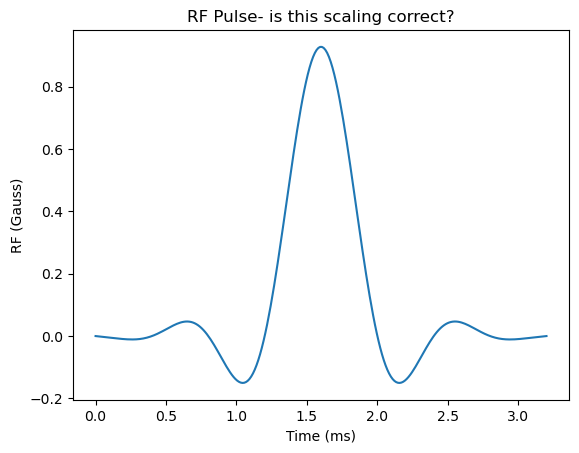

In [ ]:
#question 2: 
def rf_scale_g(rf, pulse_duration):
    #scale rf to have its amplitude in Gauss. 
    #sum of a waveform is its final flip angle. 
    #rf[k] = 'small flip angle' = gyro*B1[k]*dt 
    dt = pulse_duration/len(rf)
    B1 = rf/gyro/dt 
    #B1= B1T * 1E4 # 1T = 10,000 Gauss
    return B1

time = np.linspace(0, 3.2e-3, 256)
rf = np.pi/2*wsinc(8, len(time))
rf_gauss = rf_scale_g(rf, time[-1])
plt.plot(time*1e3, rf_gauss)    
plt.xlabel('Time (ms)')
plt.ylabel('RF (Gauss)')
plt.title('RF Pulse- is this scaling correct?')
plt.show()




/tmp/ipykernel_591251/1937248716.py:19: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = sp.signal.hamming(samples)


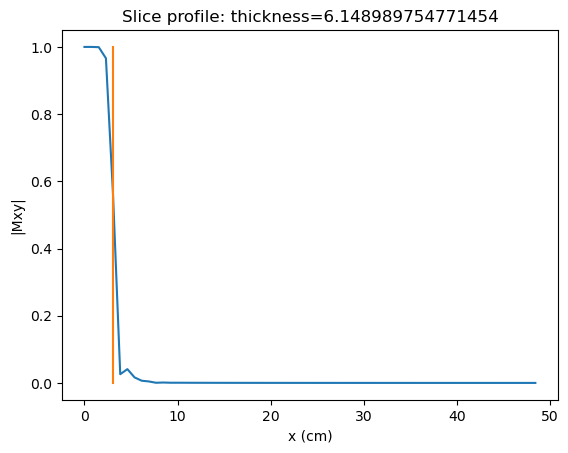

In [73]:
#question 3:
from abrm import *
from ab2ex import *


def gt2cm(x,g,t):
    #converts unitless spatial x vector to spatial position in cm. 
    #  g == G/ cm 
    #  t == ms
    # grad area:
    g_area = g*t * 1E-3 #converts ms to S. 
    kmax = gyro/(2*np.pi)*g_area *1/2 # Area under slice select lobe is 2kmax.
    #question, when does gyro come in? 
    dx = 1/(2*kmax) 
    x_cm = x*dx
    return x_cm
timebandwidth=8
rf = np.pi/2*wsinc(timebandwidth, 256)
x = np.arange(0,64) #unitless voxels
g = 0.6#Gauss/cm
t = 3.2#ms
xt = gt2cm(x, g, t) #cm

(a,b) = abrm(rf, x)
mxy = ab2ex(a,b)

#from lec2 notes: #gyro/(2*np.pi)*grad*delZ = BW
BW = timebandwidth/(t*1E-3)
delZ = BW * 2*np.pi/gyro * 1/g


plt.plot( xt, abs(mxy))
plt.plot([delZ/2,delZ/2], [0,1], label='Slice Thickness')
plt.xlabel('x (cm)')
plt.ylabel('|Mxy|')
plt.title(f'Slice profile: thickness={delZ}')
plt.show()




/tmp/ipykernel_591251/1937248716.py:19: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = sp.signal.hamming(samples)


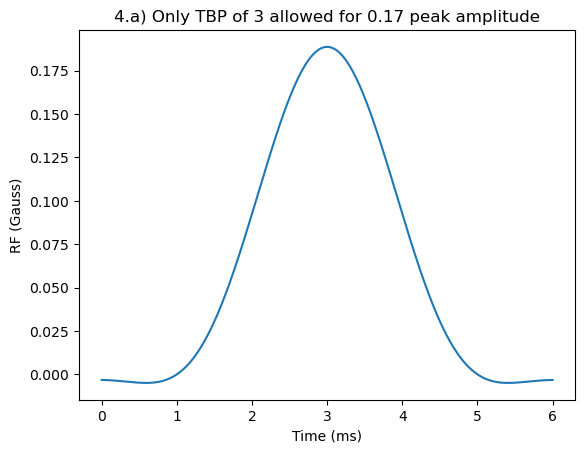

G = 0.09223484632157179 Gauss/cm


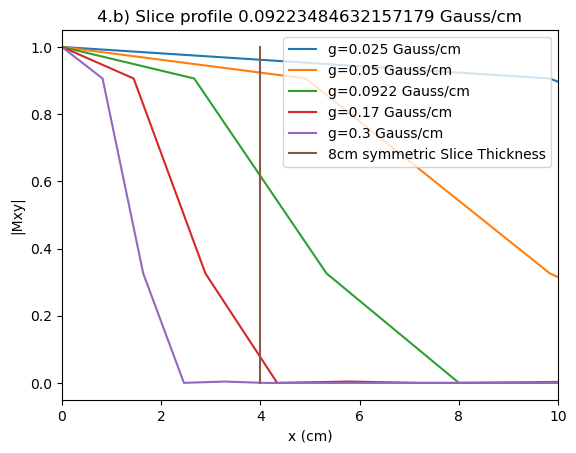

In [ ]:
#Q4 design a slab pulse. 
#
# 6mS, 0.17G peak RF amplitude.

#a.) whats the highest time bw you can allow, given max flip angle of 90deg? 
t = 6e-3
time = np.linspace(0, t, 256)
timebandwidth = 3
rf = np.pi/2*wsinc(timebandwidth, len(time)) # scaled to 90deg
rf_gauss = rf_scale_g(rf, time[-1])
plt.plot(time*1e3, rf_gauss)    
plt.xlabel('Time (ms)')
plt.ylabel('RF (Gauss)')
plt.title(f'4.a) Only TBP of {timebandwidth} allowed for 0.17 peak amplitude')#RF Pulse- is this scaling correct?')
plt.show()

#b.) what is the grad amplitude required for 8cm slab thickness?
#from lec2 notes: #gyro/(2*np.pi)*grad*delZ = BW
BW = timebandwidth/(t)
delZ = 8
grad = BW * 2*np.pi/gyro * 1/delZ
print(f"Grad = {grad} Gauss/cm for 8cm slice")

x = np.arange(0,256/2) #unitless voxels
t = t*1E3# convert to ms
for g in [0.025,0.05,0.0922, 0.17,0.3]:
    xt = gt2cm(x, g, t) #cm
    (a,b) = abrm(rf, x)
    mxy = ab2ex(a,b)

    plt.plot( xt, abs(mxy), label=f'g={g} Gauss/cm')
plt.plot([4,4], [0,1], label='8cm symmetric Slice Thickness')
plt.xlim(0,10)
plt.xlabel('x (cm)')
plt.ylabel('|Mxy|')
plt.title(f'4.b) Slice profile {grad} Gauss/cm')
plt.legend()
plt.show()

